<a href="https://colab.research.google.com/github/elliegabriel/hello-world/blob/main/Predicting_CVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from google.colab import files
uploaded = files.upload()

Saving cardio.csv to cardio (1).csv


Text(0.5, 1.0, 'CVD Across Ages')

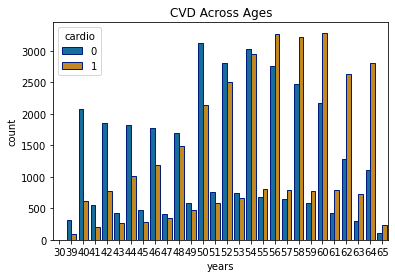

In [37]:
#Load data
df = pd.read_csv('cardio.csv', sep = ';')

#View dataset
df.head(7)
df.dtypes.value_counts() #12 ints, 1 float
df.shape #70000 by 13
list(df) #see column names.
'''The last column (cardio) is the target column. 
Note that age is in days'''
del df["id"] #delete column 1, which is not a predictive variable
df.isna().sum() #no NA values
df.isnull().values.any() #No NULL values --> returned false

#preprocess
df["cardio"] = df["cardio"].astype(str) #make cardio, the target variable, categorical
df['years'] = (df['age']/365).round(0) #create a years column and round down
df['years'] = pd.to_numeric(df['years'], downcast = 'integer')
sns.countplot(x='years', hue='cardio', data=df, palette="colorblind", edgecolor=sns.color_palette('dark', n_colors=1)).set_title('CVD Across Ages')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



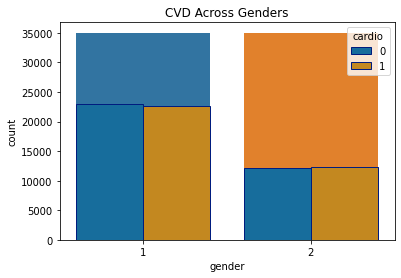

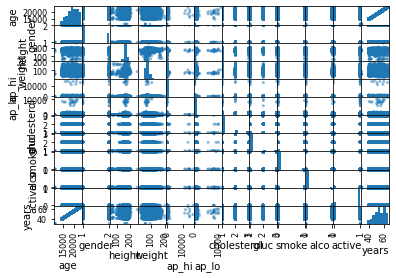

                  age    gender    height  ...      alco    active     years
age          1.000000 -0.022811 -0.081515  ... -0.029723 -0.009927  0.999090
gender      -0.022811  1.000000  0.499033  ...  0.170966  0.005866 -0.023017
height      -0.081515  0.499033  1.000000  ...  0.094419 -0.006570 -0.081456
weight       0.053684  0.155406  0.290968  ...  0.067113 -0.016867  0.053661
ap_hi        0.020764  0.006005  0.005488  ...  0.001408 -0.000033  0.020793
ap_lo        0.017647  0.015254  0.006150  ...  0.010601  0.004780  0.017754
cholesterol  0.154424 -0.035821 -0.050226  ...  0.035760  0.009911  0.154386
gluc         0.098703 -0.020491 -0.018595  ...  0.011246 -0.006770  0.098596
smoke       -0.047633  0.338135  0.187989  ...  0.340094  0.025858 -0.047884
alco        -0.029723  0.170966  0.094419  ...  1.000000  0.025476 -0.029918
active      -0.009927  0.005866 -0.006570  ...  0.025476  1.000000 -0.009819
years        0.999090 -0.023017 -0.081456  ... -0.029918 -0.009819  1.000000

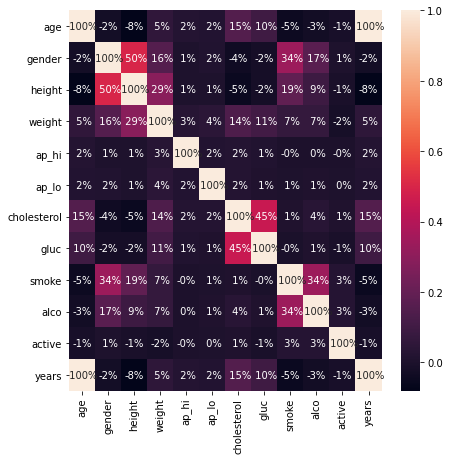

In [38]:
import plotly.express as px
from pandas.plotting import scatter_matrix
#Univariate Analysis
df.describe() # shows count, mean, std, min, max, and quartiles for every variable
df['cardio'].value_counts() #35021 do not have CVD and 34979 do have CVD
df['gender'].value_counts()

sns.countplot(df['cardio']).set_title('CVD Distribution') #barchart of just cardio

#Multivariate Analysis
##scatterplot of height and weight distribution cut by CVD
colorsIdx={"0":'no CVD', "1":'CVD'}
fig = px.scatter(df, x="height", y="weight", color = df['cardio'].map(colorsIdx),
                title="Height and Weight Distribution")
fig.show()
##grouped bar charts of gender counts cut by CVD
sns.countplot(x='gender', hue='cardio', data=df, palette="colorblind", edgecolor=sns.color_palette('dark', n_colors=1)).set_title('CVD Across Genders')
##Correlations
print(df.corr(method='pearson'))
###as a heat map###
plt.figure(figsize= (7,7))
sns.heatmap(df.corr(), annot = True, fmt = ' .0%')


Machine Learning

In [39]:
del df["years"] #delete years because we have age
#Split data into feature and target data
X = df.iloc[:,:-1].values #all info except last column
Y = df.iloc[:,-1].values #only last column

In [40]:
#Split data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)

In [41]:
#Feature scale to make all values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #object
X_train = sc.fit_transform(X_train) #do not process training data with testing data or you will have data leakage
X_test = sc.transform(X_test)


In [45]:
#Use Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

#Test the model's accuracy on training set
model = forest
model.score(X_train, Y_train) #98%

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0] #true negative
TP = cm[1][1] #true positive
FN = cm[1][0] #false negative
FP = cm[0][1] #false positive
print(cm)

print('model test accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP))) #70%

model test accuracy = 0.702
